<a href="https://colab.research.google.com/github/orkunguldali/MachineLearningFundamentalsLecture/blob/main/Lab8_RNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN
from keras.models import Sequential
import keras
from keras.optimizers import Adam

In [ ]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [ ]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

In [ ]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
no_training_epochs = 5

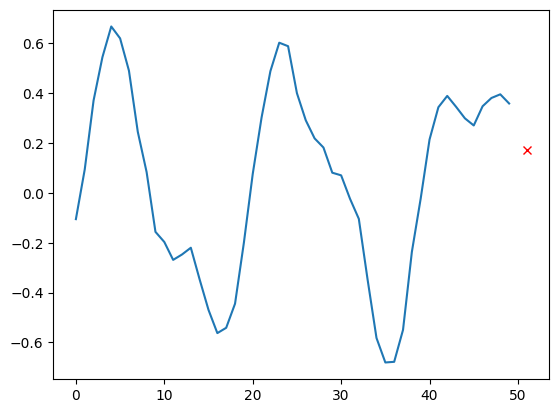

In [ ]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

In [ ]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

In [ ]:
# Model building
learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [ ]:
model_linear.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 3s 7ms/step - loss: 0.1537 - mean_squared_error: 0.1537 - val_loss: 0.0618 - val_mean_squared_error: 0.0618
Epoch 2/5
219/219 [==============================] - 1s 4ms/step - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 3/5
219/219 [==============================] - 1s 5ms/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 4/5
219/219 [==============================] - 2s 8ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 5/5
219/219 [==============================] - 2s 7ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0080 - val_mean_squared_error: 0.0080


In [ ]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

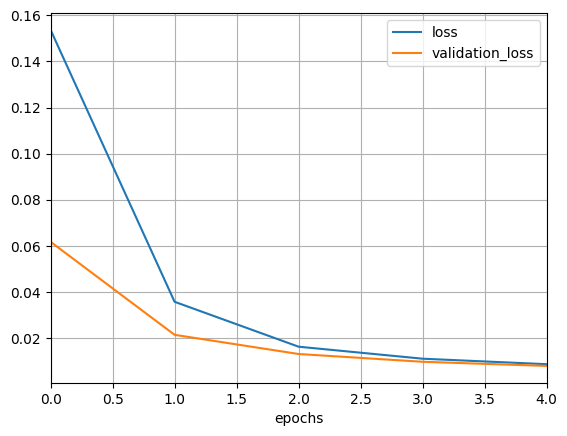

In [ ]:
plot_function(history_linear)

In [ ]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [ ]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [ ]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 20s 48ms/step - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 2/5
219/219 [==============================] - 9s 40ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 3/5
219/219 [==============================] - 6s 26ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 4/5
219/219 [==============================] - 7s 31ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 5/5
219/219 [==============================] - 6s 26ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


In [ ]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.0036633689887821674
Test MSE:  0.0036633689887821674


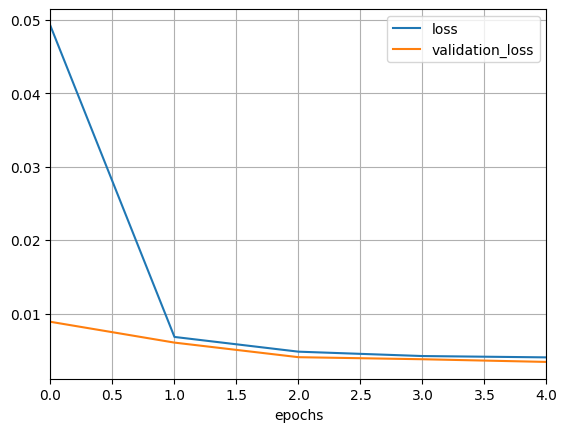

In [ ]:
plot_function(history_deep_rnn)